How are in-demand skills trending for Data Analyst in the philippines

Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [9]:
#import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data
df = pd.read_csv("data_jobs.csv")


#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#Convert Job Skills from String to List
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_da_ph = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Philippines')].copy()

In [11]:
df_da_ph['job_posted_month_no'] = df_da_ph['job_posted_date'].dt.month

In [12]:
df_da_ph_explode = df_da_ph.explode('job_skills')

In [13]:
df_da_ph_pivot = df_da_ph_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_da_ph_pivot.loc['Total'] = df_da_ph_pivot.sum()
df_da_ph_pivot = df_da_ph_pivot[df_da_ph_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_ph_pivot = df_da_ph_pivot.drop('Total')

df_da_ph_pivot

job_skills,sql,excel,python,tableau,power bi,sas,r,word,powerpoint,azure,...,sqlite,kotlin,kubernetes,monday.com,neo4j,airtable,notion,objective-c,phoenix,airflow
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,82,73,46,36,40,30,17,9,10,14,...,0,0,0,0,0,0,0,0,0,0
2,50,40,39,26,20,10,16,6,9,13,...,0,0,0,0,0,0,0,0,0,1
3,43,34,29,22,18,10,13,5,5,4,...,0,0,0,0,0,0,0,0,0,0
4,31,49,22,22,15,14,11,11,10,4,...,0,0,0,0,0,0,0,0,0,0
5,45,29,26,15,17,8,11,1,3,7,...,0,0,0,0,0,0,0,0,0,0
6,45,33,25,25,23,16,7,11,9,11,...,0,0,0,0,0,0,1,0,0,0
7,57,52,28,19,27,22,18,15,6,6,...,0,1,0,0,0,0,0,1,0,0
8,50,40,28,30,25,18,13,11,8,7,...,0,0,0,0,0,0,0,0,0,0
9,43,43,23,26,24,6,13,4,4,2,...,1,0,0,0,0,1,0,0,0,0


In [14]:
da_total = df_da_ph.groupby('job_posted_month_no').size()

In [15]:
df_da_ph_percent = df_da_ph_pivot.div(da_total/100, axis=0)

# changes month number to month name
df_da_ph_percent = df_da_ph_percent.reset_index()
df_da_ph_percent['job_posted_month'] = df_da_ph_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_ph_percent = df_da_ph_percent.set_index('job_posted_month')
df_da_ph_percent = df_da_ph_percent.drop(columns='job_posted_month_no')


df_da_ph_percent 

job_skills,sql,excel,python,tableau,power bi,sas,r,word,powerpoint,azure,...,sqlite,kotlin,kubernetes,monday.com,neo4j,airtable,notion,objective-c,phoenix,airflow
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,43.617021,38.829787,24.468085,19.148936,21.276596,15.957447,9.042553,4.787234,5.319149,7.446809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
Feb,50.000000,40.000000,39.000000,26.000000,20.000000,10.000000,16.000000,6.000000,9.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
Mar,46.236559,36.559140,31.182796,23.655914,19.354839,10.752688,13.978495,5.376344,5.376344,4.301075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
Apr,36.470588,57.647059,25.882353,25.882353,17.647059,16.470588,12.941176,12.941176,11.764706,4.705882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
May,55.555556,35.802469,32.098765,18.518519,20.987654,9.876543,13.580247,1.234568,3.703704,8.641975,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
Jun,47.872340,35.106383,26.595745,26.595745,24.468085,17.021277,7.446809,11.702128,9.574468,11.702128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.06383,0.000000,0.000000,0.0
Jul,52.777778,48.148148,25.925926,17.592593,25.000000,20.370370,16.666667,13.888889,5.555556,5.555556,...,0.000000,0.925926,0.000000,0.000000,0.000000,0.000000,0.00000,0.925926,0.000000,0.0
Aug,48.076923,38.461538,26.923077,28.846154,24.038462,17.307692,12.500000,10.576923,7.692308,6.730769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
Sep,47.252747,47.252747,25.274725,28.571429,26.373626,6.593407,14.285714,4.395604,4.395604,2.197802,...,1.098901,0.000000,0.000000,0.000000,0.000000,1.098901,0.00000,0.000000,0.000000,0.0


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


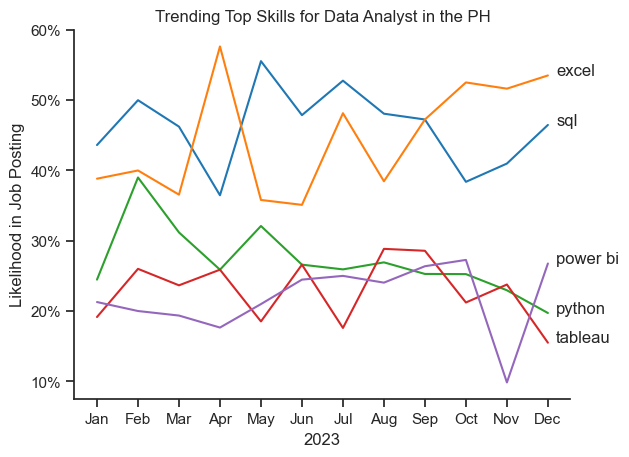

In [16]:
df_plot = df_da_ph_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analyst in the PH')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1, i], df_plot.columns[i])